In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from implementations import * 
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# import some data to test the functions
from helpers import *

ids_tr,predictions_tr,data_tr, ids_te,data_te = load_boson_data()

y=predictions_tr
x, mean_x, std_x = standardize(data_tr)

y,tx = build_model_data(x,y)

y.shape, x.shape, tx.shape, data_tr.shape

((99,), (99, 30), (99, 31), (99, 30))

(0.25910244226129664,
 array([-0.23957   ,  0.04656428, -0.14143374, -0.06856669,  0.04248811,
         0.01191912,  0.08980867,  0.01129435,  0.03016976, -0.05588546,
         0.10393991, -0.07587179,  0.06310869,  0.01174424,  0.15162489,
        -0.0766581 , -0.06406952,  0.01326901, -0.10544067, -0.1426192 ,
        -0.03785758, -0.24725381, -0.03205462, -0.02742455, -0.02395772,
        -0.03303674, -0.03341681,  0.01398749,  0.01160005,  0.01170816,
         0.08172941]))

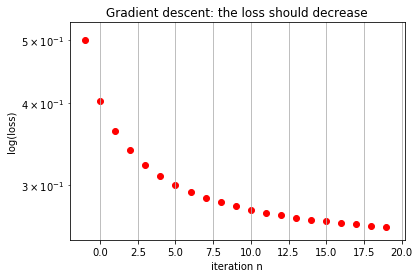

In [6]:
# gradient descent
initial_w = np.zeros(tx.shape[1])
max_iters = 20
gamma = 0.1
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, print_output=False, plot_losses=True)
loss,w

ValueError: shapes (1,31) and (2,) not aligned: 31 (dim 1) != 2 (dim 0)

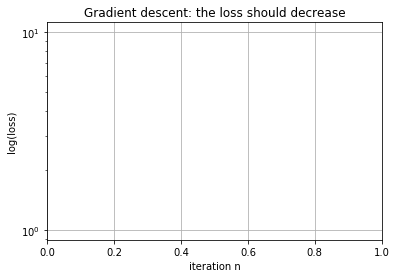

In [118]:
# stochastic gradient descent
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1, print_output=False, plot_losses=True)
loss,w

In [48]:
# analityc solution
least_squares(y, tx)

(15.3858878688294, array([ 73.293922  ,  13.47971243]))

In [49]:
# ridge regression to choose smaller weights (the simpler the model the better)
lambda_ = 0.02 # how to properly choose lambda?
ridge_regression(y, tx, lambda_)

(19.493655361271703, array([ 70.474925  ,  12.96126196]))

(88823.296494132577, array([ 0.25340497,  2.71506301, -7.40856042]))

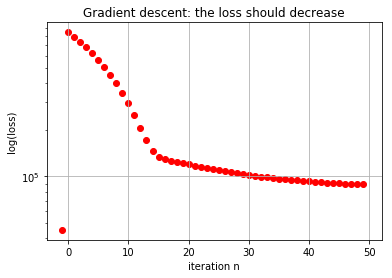

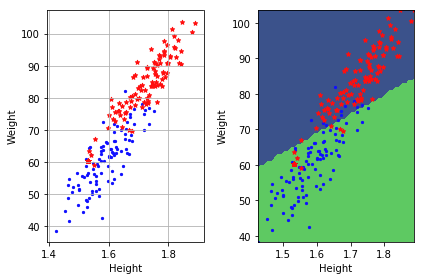

In [50]:
# logistic regression (it is gradient descent with a different loss function)
from helpers import sample_data, load_data
from plots import visualization

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

tx = build_poly(x, 1)
initial_w = np.ones(tx.shape[1])
max_iters = 50
gamma = 0.2
minloss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=-1, print_output=False, plot_losses=True, costfunc=CostFunction.PROB)
# w = np.array(w).reshape(-1, 1)
visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
minloss, w

In [17]:
tes_std = standardize(data_te)
tx_std =  build_poly(tes_std, 1)
print(tx_std.shape)
predict_labels(w, np.c_[np.ones(len(tes_std)), tes_std])

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'